# Catálogo Automático de Produtos com Texto-para-Imagem
* **Descrição:** Gerar imagens faltantes para catálogo e-commerce combinando título e atributos. Usando a biblioteca **diffusers** da HuggingFace
* **Dataset:** CSV com nome, cor, material de produtos (incluída na pasta do exercício)
* AWS (Inglês): https://genaiacademy.s3.eu-west-3.amazonaws.com/produtos/catalogo-en.csv
* AWS (Português): https://genaiacademy.s3.eu-west-3.amazonaws.com/produtos/catalogo.csv

In [7]:
!wget https://genaiacademy.s3.eu-west-3.amazonaws.com/produtos/catalogo-en.csv

--2025-04-30 15:19:04--  https://genaiacademy.s3.eu-west-3.amazonaws.com/produtos/catalogo-en.csv
Resolving genaiacademy.s3.eu-west-3.amazonaws.com (genaiacademy.s3.eu-west-3.amazonaws.com)... 16.12.18.6, 16.12.19.6
Connecting to genaiacademy.s3.eu-west-3.amazonaws.com (genaiacademy.s3.eu-west-3.amazonaws.com)|16.12.18.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1207 (1.2K) [text/csv]
Saving to: ‘catalogo-en.csv’

catalogo-en.csv     100%[===================>]   1.18K  --.-KB/s    in 0s      

2025-04-30 15:19:05 (98.6 MB/s) - ‘catalogo-en.csv’ saved [1207/1207]



In [ ]:
from diffusers import StableDiffusionPipeline
import pandas as pd
from IPython.display import display

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-base").to("cuda")

In [12]:
#Ler CSV com produtos
produtos = pd.read_csv('catalogo-en.csv')

  0%|          | 0/50 [00:00<?, ?it/s]

Produto: T-shirt, Cor: Gray, Material: Canvas


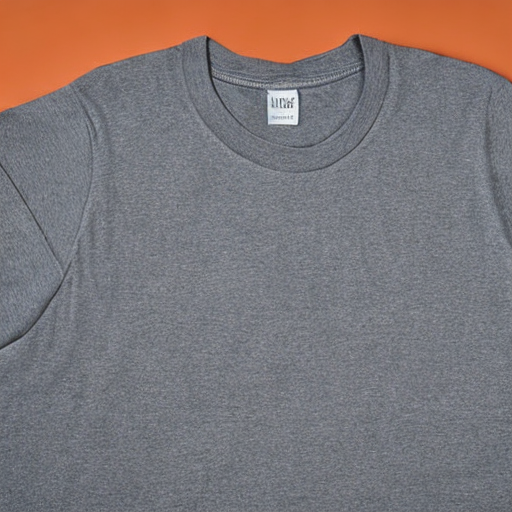

  0%|          | 0/50 [00:00<?, ?it/s]

Produto: Jeans, Cor: Orange, Material: Knit


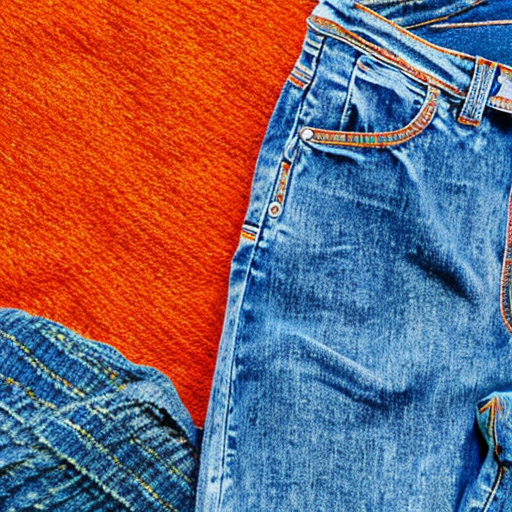

  0%|          | 0/50 [00:00<?, ?it/s]

Produto: Sports Sneakers, Cor: Pink, Material: Polyester


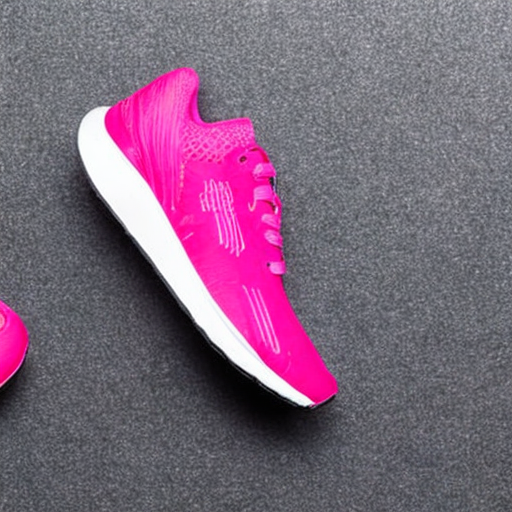

  0%|          | 0/50 [00:00<?, ?it/s]

Produto: Jacket, Cor: Blue, Material: Denim


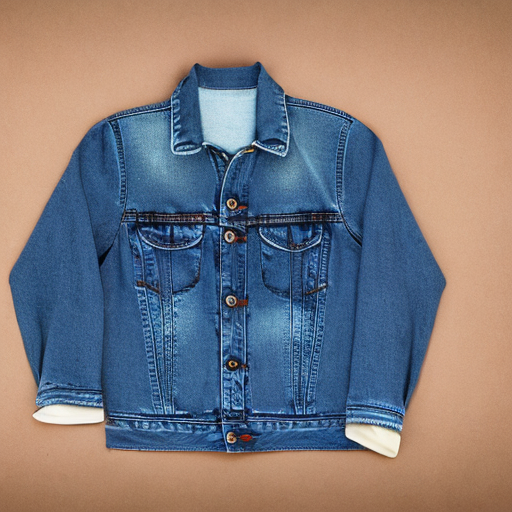

  0%|          | 0/50 [00:00<?, ?it/s]

Produto: Bag, Cor: Red, Material: Jersey


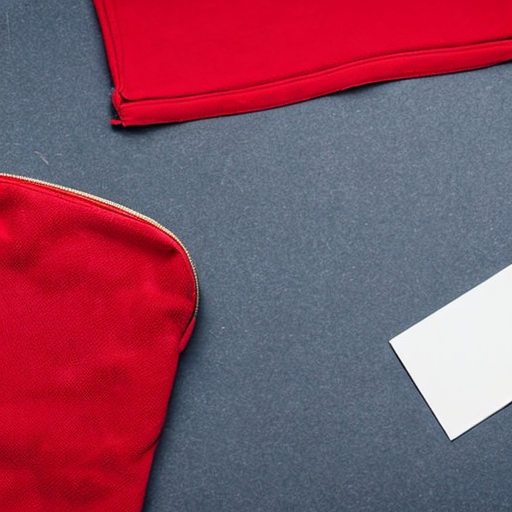

In [14]:
# Para cada row (produto)
produtos = produtos[:5]
for _,linha in produtos.iterrows():
    # Montar o prompt usando nome, cor e material
    prompt = f"Studio photo of {linha['nome']} in {linha['cor']} made of {linha['material']}"
    # Invocar o modelo
    img = pipe(prompt).images[0]
    # Salvar e/ou mostrar a imagem (nome: [coluna id].png)
    print(f"Produto: {linha['nome']}, Cor: {linha['cor']}, Material: {linha['material']}")
    display(img)
    print("\n")
    #img.save(f"imagens/{linha['id']}.png")